<a><img style="float: right;" src="./images/giannis.jpg" width="300" /></a>

#### **Hypothesis:** Shorter Players May Not Benefit as Significantly from Higher BMI as Taller Players.

The interaction effect between height and weight on player performance is significant, and the impact of having a higher BMI on performance is more pronounced for taller players than for shorter players.

#### Understanding the Hypothesis: 
My hypothesis is: "Shorter Players May Not Benefit as Significantly from Higher BMI as Taller Players." Essentially, this implies that the effect of BMI on a player's performance (measured in points scored) is different depending on the player's height. In statistical terms, this is an interaction hypothesis, where I am investigating whether the impact of one variable (BMI) on an outcome (points scored) changes at different levels of another variable (height).

#### Data Processing

In [1]:
# Import libraries

import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import the data as a DataFrame and check first 5 rows

df = pd.read_csv('ExsitingDatasets/all_seasons.csv', index_col=0)
country_codes = pd.read_csv("ExsitingDatasets/country_code.csv", index_col=0)

df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [3]:
# Add BMI value
df['bmi'] = df['player_weight'].values / (df['player_height'].values ** 2) * 10000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   player_name        12844 non-null  object 
 1   team_abbreviation  12844 non-null  object 
 2   age                12844 non-null  float64
 3   player_height      12844 non-null  float64
 4   player_weight      12844 non-null  float64
 5   college            10990 non-null  object 
 6   country            12844 non-null  object 
 7   draft_year         12844 non-null  object 
 8   draft_round        12844 non-null  object 
 9   draft_number       12844 non-null  object 
 10  gp                 12844 non-null  int64  
 11  pts                12844 non-null  float64
 12  reb                12844 non-null  float64
 13  ast                12844 non-null  float64
 14  net_rating         12844 non-null  float64
 15  oreb_pct           12844 non-null  float64
 16  dreb_pct           12844 no

## Interaction Test

### Using pts as dependent variable

In [5]:
df['height_bmi_interaction'] = df['player_height'] * df['bmi']

# Building a regression model with the height-BMI interaction term
# Replace 'pts' with your chosen performance metric
model = smf.ols('pts ~ player_height + bmi + height_bmi_interaction', data=df).fit()

# Summary of the model
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                    pts   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     18.96
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           2.91e-12
Time:                        11:26:28   Log-Likelihood:                -41245.
No. Observations:               12844   AIC:                         8.250e+04
Df Residuals:                   12840   BIC:                         8.253e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 18

#### Coefficient Analysis:

The coefficients for player_height, bmi, and the height_bmi_interaction are not statistically significant (p > 0.05).
This suggests that neither height, BMI, nor their interaction has a significant impact on points scored in this model.

#### Conclusions:
Given the high p-value, we do not have sufficient evidence to conclude that the relationship between BMI and points scored varies significantly between players of different heights, based on this dataset and model. This doesn't necessarily mean that there is no interaction effect at all, but rather that, with the data and model used, such an effect is not statistically discernible.

### Using reb as dependent variable

In [6]:
df['height_bmi_interaction'] = df['player_height'] * df['bmi']

# Building a regression model with the height-BMI interaction term
# Replace 'pts' with your chosen performance metric
model = smf.ols('reb ~ player_height + bmi + height_bmi_interaction', data=df).fit()

# Summary of the model
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                    reb   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     1101.
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:26:28   Log-Likelihood:                -28409.
No. Observations:               12844   AIC:                         5.683e+04
Df Residuals:                   12840   BIC:                         5.686e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5

#### Coefficient Analysis:

The coefficient for bmi is significant (p < 0.05) and negative, indicating that an increase in BMI is associated with a decrease in rebounds, all else being equal.
The height_bmi_interaction term is also significant (p < 0.05) and positive, suggesting that the effect of BMI on rebounds varies with player height.

#### Hypothesis Testing:
The significant and positive interaction term supports the idea that the relationship between BMI and rebounds is different for players of different heights. Specifically, it indicates that taller players may benefit more from a higher BMI in terms of rebounds than shorter players.

#### Conclusions:
The results support the hypothesis in the context of rebounds: the benefit of a higher BMI on rebounding performance appears to vary with player height.

In [7]:
df['height_bmi_interaction'] = df['player_height'] * df['bmi']

# Building a regression model with the height-BMI interaction term
# Replace 'pts' with your chosen performance metric
model = smf.ols('reb ~ player_height + bmi + height_bmi_interaction', data=df).fit()

# Summary of the model
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                    reb   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     1101.
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:26:28   Log-Likelihood:                -28409.
No. Observations:               12844   AIC:                         5.683e+04
Df Residuals:                   12840   BIC:                         5.686e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5

#### Visualization

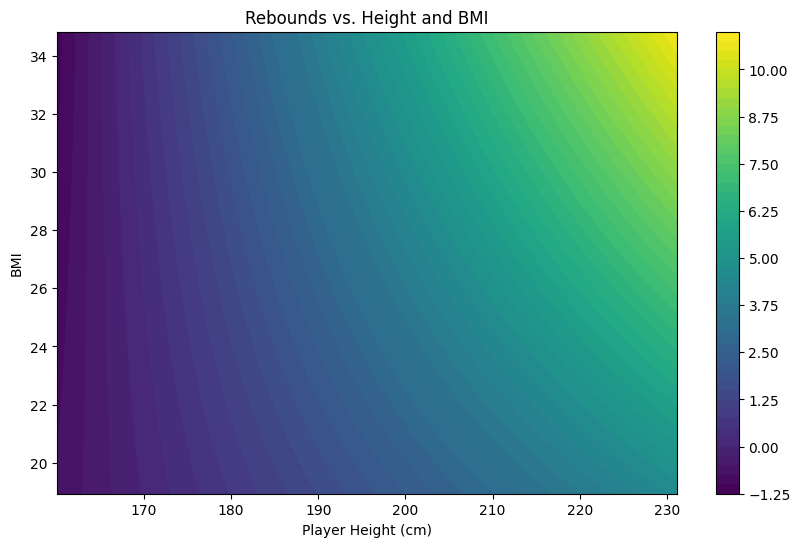

In [8]:
# Generate a range of heights and BMIs
height_range = np.linspace(df['player_height'].min(), df['player_height'].max(), 100)
bmi_range = np.linspace(df['bmi'].min(), df['bmi'].max(), 100)

# Create a meshgrid for heights and BMIs
H, B = np.meshgrid(height_range, bmi_range)

# Predict rebounds using the regression model for each combination of height and BMI
# Convert predictions to a NumPy array and then reshape
Rebounds = model.predict(exog=dict(player_height=H.ravel(), bmi=B.ravel(), 
                                   height_bmi_interaction=H.ravel()*B.ravel()))
Rebounds = np.array(Rebounds).reshape(H.shape)

# Create a contour plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(H, B, Rebounds, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.title('Rebounds vs. Height and BMI')
plt.xlabel('Player Height (cm)')
plt.ylabel('BMI')
plt.show()


##### Visual Insights:

The clearest changes in rebounds occur with changes in height, as indicated by the horizontal bands of color.
The impact of BMI on rebounds, while present, is more subtle and nuanced, which is highlighted by the vertical gradients of color.

### Using dreb_pct as dependent variable

In [9]:
df['height_bmi_interaction'] = df['player_height'] * df['bmi']

# Building a regression model with the height-BMI interaction term
# Replace 'pts' with your chosen performance metric
model = smf.ols('dreb_pct ~ player_height + bmi + height_bmi_interaction', data=df).fit()

# Summary of the model
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:               dreb_pct   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     2958.
Date:                Wed, 29 Nov 2023   Prob (F-statistic):               0.00
Time:                        11:26:28   Log-Likelihood:                 20758.
No. Observations:               12844   AIC:                        -4.151e+04
Df Residuals:                   12840   BIC:                        -4.148e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

#### Hypothesis Testing:
The hypothesis under consideration was that taller players might benefit more from a higher BMI in terms of defensive rebounds. The statistical significance of the height-BMI interaction term (p < 0.000) provides strong evidence to support this hypothesis. Specifically, the positive coefficient for the interaction term indicates that as player height increases, the relationship between BMI and defensive rebound percentage becomes more positive.

#### Visualization

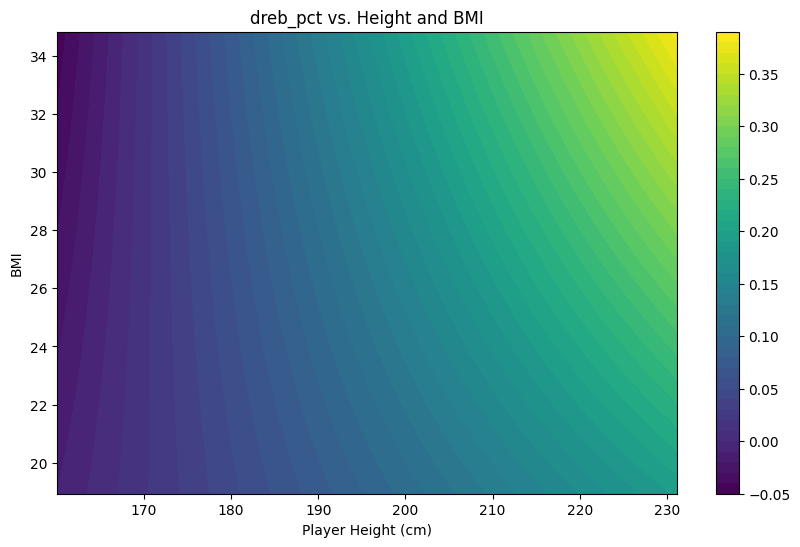

In [10]:
# Generate a range of heights and BMIs
height_range = np.linspace(df['player_height'].min(), df['player_height'].max(), 100)
bmi_range = np.linspace(df['bmi'].min(), df['bmi'].max(), 100)

# Create a meshgrid for heights and BMIs
H, B = np.meshgrid(height_range, bmi_range)

# Predict dreb_pct using the regression model for each combination of height and BMI
# Convert predictions to a NumPy array and then reshape
dreb_pct = model.predict(exog=dict(player_height=H.ravel(), bmi=B.ravel(), 
                                   height_bmi_interaction=H.ravel()*B.ravel()))
dreb_pct = np.array(dreb_pct).reshape(H.shape)

# Create a contour plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(H, B, dreb_pct, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.title('dreb_pct vs. Height and BMI')
plt.xlabel('Player Height (cm)')
plt.ylabel('BMI')
plt.show()

##### Visual Insights:
The plot shows that the effect of BMI on defensive rebound percentage is not uniform across all heights. As height increases, the increase in defensive rebound percentage becomes more pronounced. This is indicated by the color bands becoming increasingly horizontal at taller heights, signifying the interaction effect